In [6]:
#Imports
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.circuit_interface import SimpleGateList
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.optimization_settings import OptimizationSettings
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.lo_cuts_only_optimizer import LOCutsOnlyOptimizer
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.quantum_device_constraints import DeviceConstraints

## Cut finding for efficient SU(2) Circuit from tutorial 1.

### Visualize the circuit

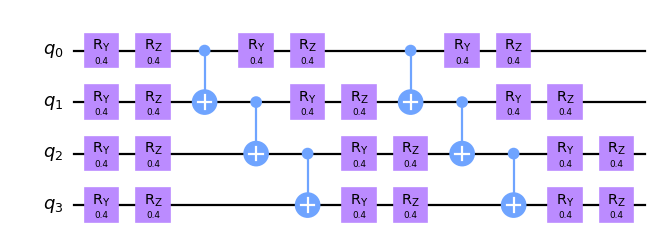

In [7]:
#visualize the circuit 
from qiskit.circuit.library import EfficientSU2
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.utils import QCtoCCOCircuit

qc = EfficientSU2(4, entanglement="linear", reps=2).decompose()
qc.assign_parameters([0.4] * len(qc.parameters), inplace=True)

circuit_ckt_su2=QCtoCCOCircuit(qc)

qc.draw("mpl", scale=0.8)

### Perform cut finding

In [8]:
interface = SimpleGateList(circuit_ckt_su2)

settings = OptimizationSettings(rand_seed = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')

qubits_per_QPU=4
num_QPUs=2


for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 1, -1):
        print(f'\n\n---------- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ----------')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs       = num_QPUs)

        op = LOCutsOnlyOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print('Gamma =', None if (out is None) else out.upperBoundGamma(),
              ', min_reached =', op.minimumReached())
        if (out is not None):
            out.print(simple=True)
        else:
            print(out)
        
        print('Subcircuits:', interface.exportSubcircuitsAsString(name_mapping='default'),'\n')




---------- 4 Qubits per QPU, 2 QPUs ----------
Gamma = 1.0 , min_reached = True
[]
Subcircuits: AAAA 



---------- 3 Qubits per QPU, 2 QPUs ----------
Gamma = 9.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[17, ['cx', 2, 3]]), Cut(Action='CutTwoQubitGate', Gate=[25, ['cx', 2, 3]])]
Subcircuits: AAAB 



---------- 2 Qubits per QPU, 2 QPUs ----------
Gamma = 9.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[9, ['cx', 1, 2]]), Cut(Action='CutTwoQubitGate', Gate=[20, ['cx', 1, 2]])]
Subcircuits: AABB 

